## 2.  Define a nutrient profile that can be systematically manipulated 

I want to build a profile that can be used to explore parameter space for the non-dimensional number $\tau_v=-Z\delta_v^2C/\delta_vC$. 

Candidate:
 
 $N(z)=N_0 + N'(z-z_0) + N''(z-z_0)^2$, where $N_0$ is the cocnetration at $z_0$. I will start with $z_0=H_s$, so $N_0$ is a reference coentration at shelf break depth.
 
 Non-dimensional profile:
 
 $\hat{N(z)}=\frac{N(z)}{N_0} = 1 + \hat{N'}(z-Hs) + \hat{N''}(z-H_s)^2$,
 
 where $\hat{}$ variables are divided by $N_0$.
 
 Below, I will call $\hat{}$ variables by their non-$\hat{}$ names.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import sympy as sym
sym.init_printing() # enable fancy printing

In [3]:
# Set appearance options seaborn

sns.set_style('white')
sns.set_context('notebook')

In [4]:
# Constants and scales from canyon bathy

#L = 6400.0 # canyon length
#R = 5000.0 # Upstream radius of curvature
#g = 9.81 # accel. gravity
#Wsb = 13000 # Width at shelf break
#Hs = 147.5 # Shelf break depth
#Hh = 97.5 # 
#Hr = 130.0 # rim depth at dn station
# NOTE: The default values of all functions correspond to the base case


In [89]:
N1,N2,z,Co,Hs = sym.symbols('N1,N2,z,Co,Hs')
func = 1 + N1*(z-Hs) + N2*((z-Hs)**2)


In [90]:
func

A reasonable number for $\hat{N'}$ is 0.006. This comes from the slope of the linear nitrate profile I use $d\hat{N}/dz \approx ((32\mu M-3 \mu M)/(150 m))/32 \mu M$. Using a higher value gives negative concetrations at surface.

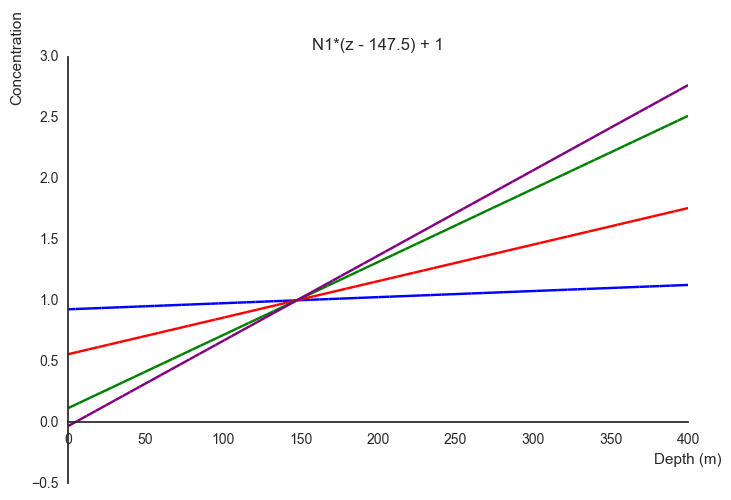

In [101]:
func = 1 + N1*(z-Hs) + N2*((z-Hs)**2)
func = func.subs({Hs:147.5,N2:0})
hand =sym.plot(func.subs(N1,0.0005),
               func.subs(N1,0.003),
               func.subs(N1,0.006),
               func.subs(N1,0.007),(z, 0, 400),
               xlabel='Depth (m)',
               ylabel='Concentration',
               title='%s' %func,
               show=False)
hand[1].line_color='r'
hand[2].line_color='g'
hand[3].line_color='purple'

hand.show()

$\hat{N''}$ has to be an order of magnitude smaller to get a decreasing profile. This might not need to be the case.

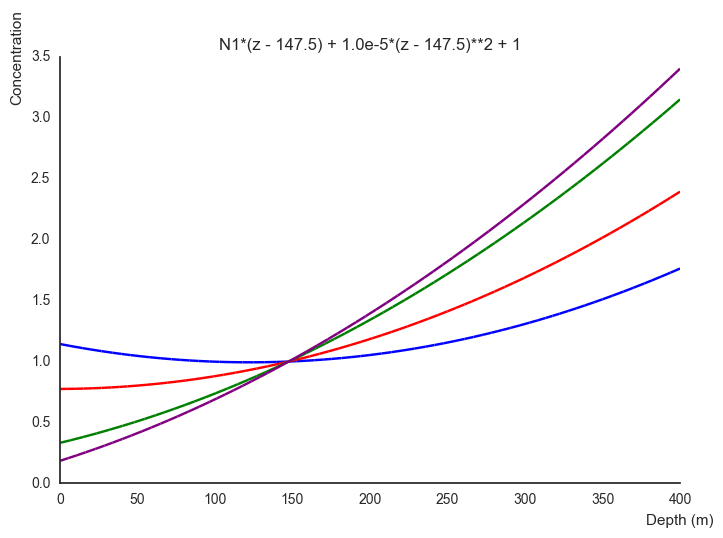

In [108]:
func = 1 + N1*(z-Hs) + N2*((z-Hs)**2)
func = func.subs({Hs:147.5,N2:0.00001})
hand =sym.plot(func.subs(N1,0.0005),
               func.subs(N1,0.003),
               func.subs(N1,0.006),
               func.subs(N1,0.007),(z, 0, 400),
               xlabel='Depth (m)',
               ylabel='Concentration',
               title='%s' %func,
               show=False)
hand[1].line_color='r'
hand[2].line_color='g'
hand[3].line_color='purple'

hand.show()

### Derivatives

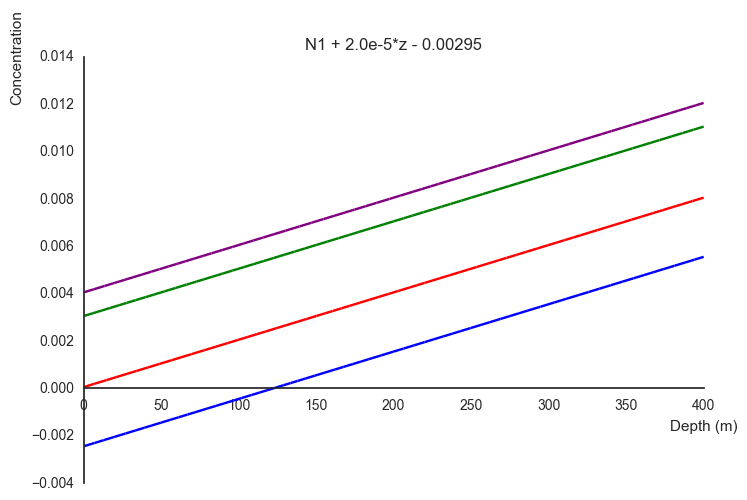

In [109]:
func = 1 + N1*(z-Hs) + N2*((z-Hs)**2)
func = func.diff(z).subs({Hs:147.5,N2:0.00001})
hand =sym.plot(func.subs(N1,0.0005),
               func.subs(N1,0.003),
               func.subs(N1,0.006),
               func.subs(N1,0.007),(z, 0, 400),
               xlabel='Depth (m)',
               ylabel='dC/dz',
               title='%s' %func,
               show=False)
hand[1].line_color='r'
hand[2].line_color='g'
hand[3].line_color='purple'

hand.show()

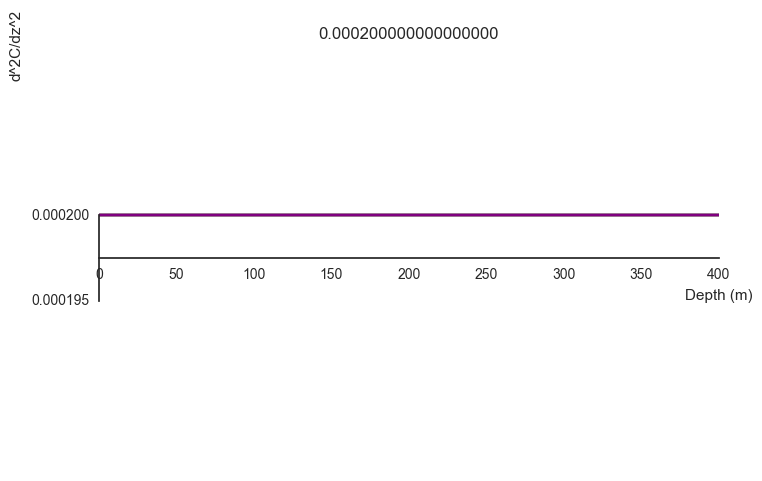

In [111]:
N1,N2,z,Hs = sym.symbols('N1,N2,z,Hs')
func = 1 + N1*(z-Hs) + N2*((z-Hs)**2)

func = (func.diff(z)).diff(z).subs({Hs:147.5,Co:3.0,N2:0.0001})
hand =sym.plot(func.subs(N1,0.0005),
               func.subs(N1,0.003),
               func.subs(N1,0.006),
               func.subs(N1,0.007),(z, 0, 400),
               xlabel='Depth (m)',
               ylabel='d^2C/dz^2',
               title='%s' %func,
               show=False)
hand[1].line_color='r'
hand[2].line_color='g'
hand[3].line_color='purple'

hand.show()

## $\tau_v$ as a function of N' and N''

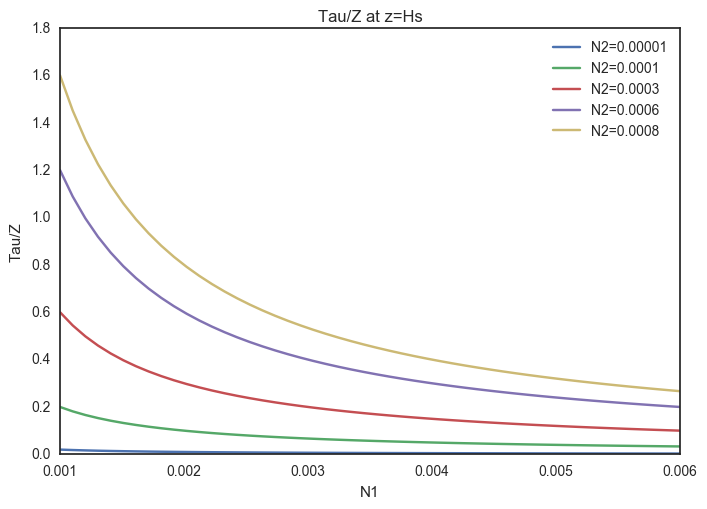

In [180]:
Hs = 147.5
N1 = np.linspace(0.001,0.006,num=50)

fig,ax = plt.subplots(1,1)
ax.plot(N1,(2*0.00001)/(N1),label='N2=0.00001')
ax.plot(N1,(2*0.0001)/(N1),label='N2=0.0001')
ax.plot(N1,(2*0.0003)/(N1),label='N2=0.0003')
ax.plot(N1,(2*0.0006)/(N1),label='N2=0.0006')
ax.plot(N1,(2*0.0008)/(N1),label='N2=0.0008')


ax.set_ylabel('Tau/Z')
ax.set_xlabel('N1')
ax.set_title('Tau/Z at z=Hs')
ax.legend(loc=0)